In [3]:
import pandas as pd

In [4]:
data_frame = pd.read_csv('/home/stan05/Documents/testPython/data.csv')

In [5]:
data_frame.shape

(18207, 89)

In [6]:
data_frame.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [7]:
data_frame.values

array([[0, 158023, 'L. Messi', ..., 14.0, 8.0, '€226.5M'],
       [1, 20801, 'Cristiano Ronaldo', ..., 14.0, 11.0, '€127.1M'],
       [2, 190871, 'Neymar Jr', ..., 15.0, 11.0, '€228.1M'],
       ...,
       [18204, 241638, 'B. Worman', ..., 6.0, 13.0, '€165K'],
       [18205, 246268, 'D. Walker-Rice', ..., 8.0, 9.0, '€143K'],
       [18206, 246269, 'G. Nugent', ..., 12.0, 9.0, '€165K']],
      dtype=object)

In [13]:
df = pd.DataFrame(data_frame, columns=['Name', 'Wage', 'Value'])

In [72]:
def value_to_float(x):
    if type(x) == int or type(x) == float:
        return x
    
    if('M' in x):
        return float(x.replace('M', '').replace('€', '')) * 1000000
      
    if('K' in x):
        return float(x.replace('K', '').replace('€', '')) * 1000
  
    return 0.0

In [61]:
df = df.drop(['Difference, ValueInt', 'WageInt'], axis=1)

KeyError: "['Difference, ValueInt'] not found in axis"

In [67]:
df.head()

df2 = df[['Name', 'Wage', 'Value']]
df2.drop(['WageInt'], axis=1)

In [81]:
# df2['ValueInt'] = df2['Value'].apply(value_to_float)
# df2['WageInt'] = df2['Wage'].apply(value_to_float)
df2['Difference'] = df2['ValueInt'] - df2['WageInt']
# df2 = df2.drop(['WageInt'], axis=1)
df2.head()

,Name,Wage,Value,ValueInt,WageInt,Difference
0,L. Messi,€565K,€110.5M,110500000.0,565000.0,109935000.0
1,Cristiano Ronaldo,€405K,€77M,77000000.0,405000.0,76595000.0
2,Neymar Jr,€290K,€118.5M,118500000.0,290000.0,118210000.0
3,De Gea,€260K,€72M,72000000.0,260000.0,71740000.0
4,K. De Bruyne,€355K,€102M,102000000.0,355000.0,101645000.0


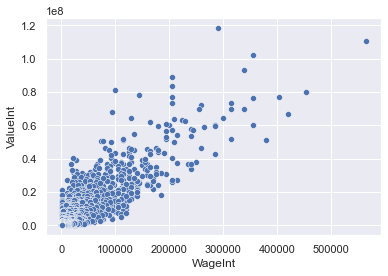

In [102]:
import seaborn as sns
from bokeh.plotting import figure, show, save
from bokeh.models import HoverTool
from os import chdir

# set up default path
chdir('/home/stan05/Documents/testPython')

# set up the graph visualisation
sns.set()
graph = sns.scatterplot(x='WageInt', y='ValueInt', data=df2)

# set up bokeh to see labels information of the graph
hover = HoverTool(tooltips=[
    ('index', '$index'),
    ('(Wage, Value)', '($WageInt, $ValueInt))'),
    ('Name', '$Name'),
])

p = figure(title='Soccer 2019', x_axis_label='Wage', y_axis_label='Value', plot_width=1000, plot_height=1000, tools=[hover])
p.circle('WageInt', 'ValueInt', size=10, source=df2) # x, y, size, source
show(p)